#### Welcome to the Tutorial Notebook!

This notebook runs through the dataset we have and uses any needed python libraries and my .py documents.


In [1]:
import read_data as rd
import clean_data as cd
import create_keras_model as ckm
import model_fit as mf
import pandas as pd
import numpy as np
import sys
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.plots import plot_objective
from skopt.utils import use_named_args

import matplotlib.pyplot as plt
%matplotlib inline

#2019 uci news dataset
dataset = 'uci-news-aggregator.csv'

#### STEP 1: Run the .csv file, group by categories and plot the categorie distrivution sample.

In [2]:
rd.read_data(dataset).head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
cat_count, dt = cd.clean_data(dataset)
cat_count

,CATEGORY
e,17943
b,13648
t,12976
m,5433


Text(0.5, 1.0, 'Count of News Articles in each Category')

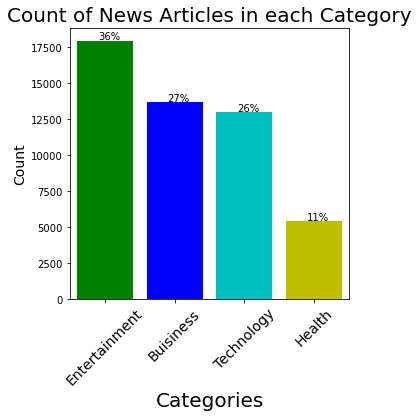

In [4]:
#plotting the distribution of counts of categories
plt.bar(cat_count.index,cat_count['CATEGORY'], color = ['g','b','c','y'])

ax = cat_count['CATEGORY'].plot(kind='bar' ,color = ['g','b','c','y'],figsize=(5,5), edgecolor=None)

for p in ax.patches[:4]:
    width, height = p.get_width(), p.get_height()
    perc = height/cat_count['CATEGORY'].sum()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(perc), (x+0.3, y + height + 70))


plt.xticks(cat_count.index,['Entertainment' , 'Buisiness', 'Technology','Health'],rotation=45, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Categories' ,  fontsize=20)
plt.title('Count of News Articles in each Category', fontsize=20)

#### STEP 2: Create a benchmark model and Initilize arbitrary hyperparameters for it .

In [5]:
#Initilize arbitrary hyperparameters for the model
benchmark_model = [1e-5, 1, 16, 'sigmoid']
default_parameters = [1e-5, 1, 16, 'sigmoid', 16]

In [6]:
#Create a benchmark model and print out the summary
model = ckm.create_model(benchmark_model[0], benchmark_model[1], benchmark_model[2], benchmark_model[3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 10, 64)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 6, 64)             20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
layer_dense_1 (Dense)        (None, 16)                1

In [7]:
#Test with dafault parameters
default_model = mf.fitness(default_parameters)

learning rate: 1.0e-05
num_dense_layers: 1
num_dense_nodes: 16
activation: sigmoid

Epoch 1/3
274/274 [==============================] - 4s 12ms/step - loss: 1.3343 - accuracy: 0.3556 - val_loss: 1.3189 - val_accuracy: 0.3665
Epoch 2/3
274/274 [==============================] - 2s 8ms/step - loss: 1.3264 - accuracy: 0.3576 - val_loss: 1.3153 - val_accuracy: 0.3665
Epoch 3/3
274/274 [==============================] - 2s 8ms/step - loss: 1.3261 - accuracy: 0.3540 - val_loss: 1.3133 - val_accuracy: 0.3665

Accuracy: 36.65%



#### STEP 3: Run the skopt minimize function on the model .

In [8]:
#Run the minimize function from skopt
search_result = mf.minimize()

learning rate: 1.0e-05
num_dense_layers: 1
num_dense_nodes: 4
activation: sigmoid

Epoch 1/3
274/274 [==============================] - 5s 15ms/step - loss: 1.5683 - accuracy: 0.2669 - val_loss: 1.5438 - val_accuracy: 0.2524
Epoch 2/3
274/274 [==============================] - 2s 9ms/step - loss: 1.5366 - accuracy: 0.2601 - val_loss: 1.5070 - val_accuracy: 0.2524
Epoch 3/3
274/274 [==============================] - 2s 9ms/step - loss: 1.4975 - accuracy: 0.2615 - val_loss: 1.4762 - val_accuracy: 0.2524

Accuracy: 25.24%

learning rate: 1.1e-05
num_dense_layers: 5
num_dense_nodes: 56
activation: sigmoid

Epoch 1/3
274/274 [==============================] - 6s 16ms/step - loss: 1.4555 - accuracy: 0.2701 - val_loss: 1.3934 - val_accuracy: 0.2733
Epoch 2/3
274/274 [==============================] - 2s 9ms/step - loss: 1.3820 - accuracy: 0.2732 - val_loss: 1.3480 - val_accuracy: 0.2733
Epoch 3/3
274/274 [==============================] - 4s 13ms/step - loss: 1.3494 - accuracy: 0.2668 - val_l

learning rate: 3.1e-03
num_dense_layers: 1
num_dense_nodes: 128
activation: sigmoid

Epoch 1/3
274/274 [==============================] - 8s 23ms/step - loss: 1.2738 - accuracy: 0.3976 - val_loss: 0.5277 - val_accuracy: 0.8057
Epoch 2/3
274/274 [==============================] - 4s 16ms/step - loss: 0.5004 - accuracy: 0.8238 - val_loss: 0.3915 - val_accuracy: 0.8698
Epoch 3/3
274/274 [==============================] - 5s 16ms/step - loss: 0.3526 - accuracy: 0.8823 - val_loss: 0.3635 - val_accuracy: 0.8787

Accuracy: 87.87%

learning rate: 1.0e-01
num_dense_layers: 1
num_dense_nodes: 128
activation: relu

Epoch 1/3
274/274 [==============================] - 8s 23ms/step - loss: 1.6812 - accuracy: 0.3423 - val_loss: 1.4085 - val_accuracy: 0.2527
Epoch 2/3
274/274 [==============================] - 4s 15ms/step - loss: 1.3327 - accuracy: 0.3392 - val_loss: 1.3193 - val_accuracy: 0.3665
Epoch 3/3
274/274 [==============================] - 4s 16ms/step - loss: 1.3197 - accuracy: 0.3505 - va

In [9]:
#Optimized Hyperparameters in a list
search_result.x

[0.003561353190249207, 1, 128, 'relu']

In [10]:
#Testing the benchmark model on the optimized hyperparameters
opt_par = search_result.x
optimized_model = mf.fitness(opt_par)

learning rate: 3.6e-03
num_dense_layers: 1
num_dense_nodes: 128
activation: relu

Epoch 1/3
274/274 [==============================] - 8s 22ms/step - loss: 1.0223 - accuracy: 0.5376 - val_loss: 0.3494 - val_accuracy: 0.8821
Epoch 2/3
274/274 [==============================] - 4s 16ms/step - loss: 0.3658 - accuracy: 0.8784 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 3/3
274/274 [==============================] - 4s 16ms/step - loss: 0.2632 - accuracy: 0.9123 - val_loss: 0.2902 - val_accuracy: 0.9040

Accuracy: 90.40%



#### STEP 4: Train the model on the default hyperparameters with more epochs.

In [11]:
#Train model on default hyperparameters with more epochs
def_hist = mf.plot_accuracy(default_parameters)

Epoch 1/20
274/274 [==============================] - 6s 15ms/step - loss: 1.5674 - accuracy: 0.1150 - val_loss: 1.5190 - val_accuracy: 0.1079
Epoch 2/20
274/274 [==============================] - 4s 15ms/step - loss: 1.5175 - accuracy: 0.1306 - val_loss: 1.4767 - val_accuracy: 0.1079
Epoch 3/20
274/274 [==============================] - 4s 15ms/step - loss: 1.4788 - accuracy: 0.1531 - val_loss: 1.4420 - val_accuracy: 0.1079
Epoch 4/20
274/274 [==============================] - 4s 15ms/step - loss: 1.4482 - accuracy: 0.2018 - val_loss: 1.4139 - val_accuracy: 0.2733
Epoch 5/20
274/274 [==============================] - 4s 16ms/step - loss: 1.4213 - accuracy: 0.2524 - val_loss: 1.3911 - val_accuracy: 0.2733
Epoch 6/20
274/274 [==============================] - 4s 15ms/step - loss: 1.4044 - accuracy: 0.2786 - val_loss: 1.3732 - val_accuracy: 0.3665
Epoch 7/20
274/274 [==============================] - 4s 15ms/step - loss: 1.3860 - accuracy: 0.3111 - val_loss: 1.3590 - val_accuracy: 0.3665

#### STEP 5: Train the model on the optimized hyperparameters with more epochs.

In [12]:
#Train model on optimized hyperparameters with more epochs
opt_hist = mf.plot_accuracy(opt_par)


Epoch 1/20
274/274 [==============================] - 6s 16ms/step - loss: 1.0496 - accuracy: 0.5048 - val_loss: 0.3677 - val_accuracy: 0.8781
Epoch 2/20
274/274 [==============================] - 4s 15ms/step - loss: 0.3821 - accuracy: 0.8712 - val_loss: 0.3037 - val_accuracy: 0.8991
Epoch 3/20
274/274 [==============================] - 4s 16ms/step - loss: 0.2790 - accuracy: 0.9084 - val_loss: 0.2910 - val_accuracy: 0.9046
Epoch 4/20
274/274 [==============================] - 4s 16ms/step - loss: 0.2241 - accuracy: 0.9265 - val_loss: 0.2943 - val_accuracy: 0.9029
Epoch 5/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1988 - accuracy: 0.9377 - val_loss: 0.3003 - val_accuracy: 0.9035
Epoch 6/20
274/274 [==============================] - 4s 16ms/step - loss: 0.1875 - accuracy: 0.9389 - val_loss: 0.3044 - val_accuracy: 0.9015
Epoch 7/20
274/274 [==============================] - 4s 16ms/step - loss: 0.1695 - accuracy: 0.9444 - val_loss: 0.3178 - val_accuracy: 0.8998

#### STEP 6: Plot the accuracies and the loss for the two models .

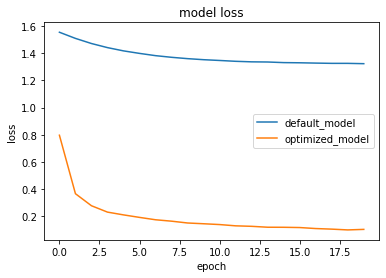

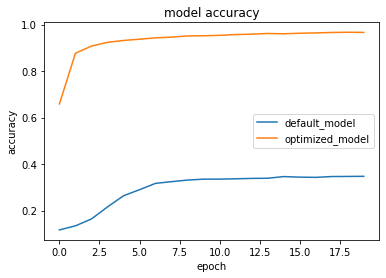

In [16]:
plt.plot(def_hist.history['loss'])
plt.plot(opt_hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['default_model', 'optimized_model'], loc='center right')
plt.show()

plt.plot(def_hist.history['accuracy'])
plt.plot(opt_hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['default_model', 'optimized_model'], loc='center right')
plt.show()